# Gaining Intuition about regularization

## Learning Goal  
The goal of this notebook is to get hands on experience and intuition about regularizers.

## Overview:

This notebook is going to give us intuition about regularization. As we discussed in class, there is a fundamental difference between in minimizing the in-sample error and my minimizing the out-of-sample error. The underlying reason for this is that the training data may not be representative of the full data distribution. From a Bayesian point of view, as David MacKay likes to repeat: <i>We can't make predictions without making assumptions.</i> Thus, it is sensible to introduce priors that reflect the fact that we are likely to be undersampled (especially in high dimensions).

Here we will consider two different/classes of regularizers. The error functions in the frequentist formulation are proportional to the negative log-likelihood whereas the regularizers can be thought of as priors. Minimizing the combined in-sample error + regularization terms is the samethe <b> Maximum a posteriori probability (MAP)</b> estimate in Bayesian regression (the parameters at which the posterior probability distributio is peaked). Note that in a true Bayesian approach, we should not use the mode of the posterior but average over all possible choices of parameters weighted by their posterior probability. In practice, this is seldom done (for computational and practical reasons).

We will consider the linear regression problem. Consider data of the form $(y_i,\vec{x}_i)$ where the index $i=1\ldots n$ runs over the number of examples in the training data and $\mathbf{x}$ is a $p$-dimensional feature vector. For notational convenience, it is useful to define the $n \times p$ <b>design matrix</b> $X$ whose rows are the examples and columns are the measured "features". We can also define the $n$-dimensional column vector of examples $y$ and the $p$-dimensional column vector of parameters $\vec{w}$ (which through abuse of notation we will often denote $w$).

Then, we will work with the error sum-of-square error function
$$
E=||Xw-y||_2 =(Xw-y)^T(Xw-y)= \sum_{i=1}^n (y_i -\vec{w}\cdot\vec{x}_i)^2
$$



### Excercise 1: ###  
What choice of Likelihood function does this correspond to?




We will also be interested in choosing regularization functions. We will be concerned with two classes of regularizers: <b> L2-regularization</b> which is often called <b> Ridge-Regression</b> (or <b>Tikhonov regression </b>) and <b> L1-regularization</b> which goes under the name <b>LASSO</b> (and is closely related to <b>Compressed Sensing</b>).

## Ridge Regression
In Ridge-Regression, the regularization penalty is taken to be the L2-norm of the parameters
$$
E_{ridge}= \alpha ||w||_2^2 = \alpha \vec{w}\cdot \vec{w}=\alpha \sum_{\gamma=1}^p w_\gamma w_\gamma.
$$

Thus, the model is fit by minimizing the sum of the in-sample error and the regularization term
$$
w_{ridge}(\alpha)= \underset{w}{\operatorname{argmin}} ||Xw-y||_2 + \alpha ||w||_2^2,
$$
where we have made the dependence on $\alpha$ explicit. Notice that the parameter $\alpha$ controls how much we weigh the fit and regularization term.

### Excercise 2: ###  
<ul>
<li>What choice of prior does this correspond to if we are performing a MAP estimate?
<li>Derive an analytic expression for $w_{ridge}$ as a function of $\alpha$? 
<li>(At home) Express your answer in terms of the Singular Value Decomposition of $X$.
</ul>

## LASSO ##

We will also be interested in the case where the penaly is the L1-norm of the parameters (sum of absolute values of parameters). This is called LASSO.
$$
E_{LASSO}= \alpha ||w||_1 = \alpha \sum_{\gamma=1}^p |w_\gamma| .
$$
In this case, 
$$
w_{LASSO}(\alpha)= \underset{w}{\operatorname{argmin}} {1 \over 2n} ||Xw-y||_2 + \alpha ||w||_1,
$$


### Excercise 3: ###  
<ul>
<li>What choice of prior does this correspond to if we are performing a MAP estimate?
<li>In this case, we can't we derive an analytic expression for $w_{LASSO}$? Do you have any ideas about how we
might be able to efficiently numerically calculate this? 
<li> Do you think LASSO and Ridge Regression will give qualitatively different answers? (Consider the limits $\alpha=0$ and $\alpha = \infty$.)
</ul>

## Numerical Experiments with Ridge Regression and LASSO##

We will now do some numerical experiments with the Diabetes Dataset trying to predict diabetes outcomes one year forward. More on the data set <a href="https://archive.ics.uci.edu/ml/datasets/Diabetes">here</a>. From the famous <a href="http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf">Least Angle Regression</a> paper by Efron, Hastie, Johnstone, Tibshirani:
<blockquote>Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood
serum measurements were obtained for each of n = 442diabetes patients, as well as the
response of interest, a quantitative measure of disease progression one year after baseline.</blockquote>


We start by plotting the weights for each value of $\alpha$ for Ridge Regression and LASSO. This is called a regularization path.

Automatically created module for IPython interactive environment


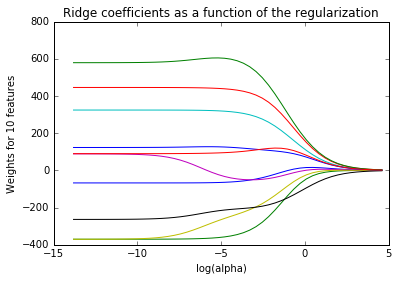

In [1]:
%matplotlib inline

#This code is modified from plot_cv_diabetes.py in the skit-learn documentation
#and plot_ridge_path.py



from __future__ import print_function
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cross_validation, datasets, linear_model

#Load Training Data set with 150 examples

number_examples=150
diabetes = datasets.load_diabetes()
X = diabetes.data[:number_examples]
y = diabetes.target[:number_examples]

#Set up Lasso and Ridge Regression models
ridge=linear_model.Ridge()
lasso = linear_model.Lasso()


#Chooose paths
alphas = np.logspace(-6, 2, 50)

#Initialize coeffficients for ridge regression and Lasso

coefs_ridge = []
coefs_lasso=[]
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs_ridge.append(ridge.coef_)

###############################################################################
# Display results

plt.plot(np.log(alphas), coefs_ridge)
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('log(alpha)')
plt.ylabel('Weights for 10 features')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()



### Excercise 4: ###  
<ul>
<li>What do the points $\alpha=0$ and $\alpha=10^5$ correspond to? Is it strange that the weights are not monotonic in $\alpha$? Why do you think this might be?
<li>Make a similar regularization plot for LASSO? 
<li> What is the qualitative difference between the LASSO path and Ridge Path? Did this agree with your earlier predictions. Can you make some qualitative argument to rationalize this difference?
<li>How do your answers change are you vary the number of examples?
</ul>

## Cross Validation ##

Hopefully, we saw that one gets qualitatively different kind of answers from LASSO and Ridge regression. We will discuss this more later. For now, we still do not know how to choose $\alpha$.

One very successful strategy for choosing $\alpha$ is cross-validation. The idea behind cross-validation comes from the idea that the regularization is an ad hoc fix for generalization error. Thus, we should choose the $\alpha$ that makes the best predictions out-of-sample. 

The idea behind cross-validation is to break up the data into test and training sets and then choose the $\alpha$ that minimizes the error on the test set. There are many automatic routines for doing this in the scikit-learn package in python. 

One of the most common is K-fold validation. Here, the data is divided into $K$ sets. $K-1$ of these are designated the training data and the last one the test set. This is then repeated $K$ times (with each set serving as the training data). 

### Excercise 5: ###  
<ul>
<li>How could we use K-fold cross-validation to choose $\alpha$ ?
</ul>

We will now calculate the error on the data using the 150 examples using the cross_validation function.

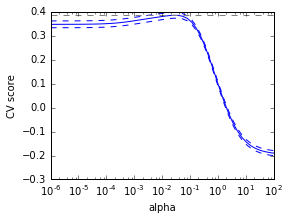

In [2]:
scores_ridge = list()
scores_ridge_std = list()

for alpha in alphas:
    ridge.alpha = alpha
    this_scores = cross_validation.cross_val_score(ridge, X, y, n_jobs=1)
    scores_ridge.append(np.mean(this_scores))
    scores_ridge_std.append(np.std(this_scores))

plt.figure(figsize=(4, 3))
plt.semilogx(alphas, scores_ridge)
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, np.array(scores_ridge) + np.array(scores_ridge_std) / np.sqrt(len(X)),
             'b--')
plt.semilogx(alphas, np.array(scores_ridge) - np.array(scores_ridge_std) / np.sqrt(len(X)),
             'b--')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores_ridge), linestyle='--', color='.5')

### Excercise 6: ###  
<ul>
<li>Based on this which $\alpha$ should we choose ?
<li> Is the standard deviation enough be confident in our choice?
</ul>

### Excercise 7: ###  
<ul>
<li>Make a similar plot for the LASSO regression?
<li>How do the errors on LASSO and Ridge regression compare? Can we say why one is better than the other?
</ul>

We can now check how well we are doing using 3-fold cross validation (default)

In [3]:
ridge_cv = linear_model.RidgeCV(alphas=alphas)
k_fold = cross_validation.KFold(len(X), 3)

print("Answer to the bonus question:",
      "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold):
    ridge_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, ridge_cv.alpha_, ridge_cv.score(X[test], y[test])))


Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 0.05429, score: 0.51673
[fold 1] alpha: 0.03728, score: 0.18793
[fold 2] alpha: 0.03728, score: 0.44444


### Excercise 8: ###  
<ul>
<li>Based on this, can we be confident in $\alpha$ ? 
<li> How does this change if we change number of data points
</ul>

### Excercise 9: ###  
<ul>
<li> Repeat this for LASSO.
</ul>